In [18]:
# from sklearn import svm
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [3]:
test_data = pd.read_csv("../../../../../res/churndata/test.csv")
train_data = pd.read_csv("../../../../../res/churndata/training.csv")
unseen_data = pd.read_csv("../../../../../res/churndata/unseen.csv")

x_test = test_data.drop(["Churn?"], axis=1)
x_train = train_data.drop(["Churn?"], axis=1)
x_unseen = unseen_data.drop(["Churn?"], axis=1)

y_test = test_data["Churn?"]
y_train = train_data["Churn?"]
y_unseen = unseen_data["Churn?"]

In [11]:
model = SVC(C=1000, kernel="rbf")
model.fit(x_train, y_train)
train_scr = model.score(x_train, y_train)
test_scr = model.score(x_test, y_test)
unseen_scr = model.score(x_unseen, y_unseen)
print(str(train_scr))
print(str(test_scr))
print(str(unseen_scr))

0.9305615087869695
0.9054054054054054
0.9191616766467066


Text(0.5, 0, 'Permutation Importance')

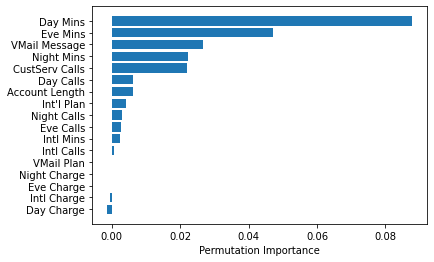

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

perm_importance = permutation_importance(model, x_train, y_train)
features = model.feature_names_in_

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [14]:
perm_importance

{'importances_mean': array([ 6.08658380e-03,  4.02914702e-03,  1.71453065e-04,  2.66609516e-02,
         8.76982426e-02,  6.25803686e-03, -1.28589799e-03,  4.70638663e-02,
         2.57179597e-03, -8.57265324e-05,  2.22888984e-02,  3.00042863e-03,
         0.00000000e+00,  2.40034291e-03,  6.85812259e-04, -4.28632662e-04,
         2.18602658e-02]),
 'importances_std': array([0.00236953, 0.00131696, 0.00020999, 0.00354912, 0.00219567,
        0.00064152, 0.00046954, 0.00315446, 0.00162655, 0.00017145,
        0.00319612, 0.00140863, 0.        , 0.00154783, 0.00128875,
        0.00038338, 0.00237881]),
 'importances': array([[ 0.00428633,  0.00342906,  0.00514359,  0.00985855,  0.00771539],
        [ 0.00514359,  0.00342906,  0.00514359,  0.00171453,  0.00471496],
        [ 0.        ,  0.        ,  0.        ,  0.00042863,  0.00042863],
        [ 0.02186027,  0.02614659,  0.02486069,  0.03257608,  0.02786112],
        [ 0.08829833,  0.08572653,  0.09172739,  0.08615517,  0.0865838 ],
  

In [47]:
from sklearn.model_selection import cross_val_predict
test_predicted = cross_val_predict(model, x_test, y_test, cv=5)
print(test_predicted[:100])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
from sklearn.model_selection import cross_val_predict
unseen_predicted = cross_val_predict(model, x_unseen, y_unseen, cv=5)
print(unseen_predicted[:100])

[0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
recall_score(y_test, test_predicted)

0.48514851485148514

[[267  20]
 [ 27  20]]
True negatives: 267
False negatives: 27
True Positives: 20
False Positives: 20


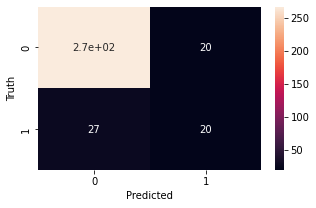

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_unseen,unseen_predicted)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm)
print("True negatives: " + str(cm[0][0]))
print("False negatives: " + str(cm[1][0]))
print("True Positives: " + str(cm[1][1]))
print("False Positives: " + str(cm[0][1]))

In [56]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_unseen, unseen_predicted)

0.8592814371257484

In [57]:
# Precision score
from sklearn.metrics import precision_score
precision_score(y_unseen, unseen_predicted)

0.5

In [58]:
# Recall score
from sklearn.metrics import recall_score
recall_score(y_unseen, unseen_predicted)

0.425531914893617

In [59]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_unseen, unseen_predicted)

0.6779227518718955